In [3]:
import tensorflow as tf
import keras
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [4]:
train = pd.read_csv('train.csv')
train[:5]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = train['label']
labels = labels.to_numpy().reshape(42000, 1)
labelsEncode = to_categorical(labels)

In [6]:
images = train.drop('label', 1)

In [8]:
trainimages = images.to_numpy()
trainimages = trainimages.reshape((42000,28,28))

In [9]:
trainimagesdense = images.to_numpy()

In [10]:
def basicModel():
    inputImage = Input(shape=(784,))
    
    X = Dense(32, activation='relu', kernel_regularizer='l2')(inputImage)
    X = Dense(32, activation='relu', kernel_regularizer='l2')(X)
    X = Dense(32, activation='relu', kernel_regularizer='l2')(X)
    outputs = Dense(10, activation='softmax', kernel_regularizer='l2')(X)
    
    model = Model(inputs = inputImage, outputs = outputs)
    return model

In [71]:
model = basicModel()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainimagesdense, labelsEncode, epochs=10, batch_size=128)

Epoch 1/10
42000/42000 [==============================] - 3s 66us/step - loss: 6.4570 - acc: 0.6114
Epoch 2/10
42000/42000 [==============================] - 1s 32us/step - loss: 3.2862 - acc: 0.7864
Epoch 3/10
42000/42000 [==============================] - 1s 32us/step - loss: 1.4553 - acc: 0.8790
Epoch 4/10
42000/42000 [==============================] - 1s 34us/step - loss: 0.8180 - acc: 0.9294
Epoch 5/10
42000/42000 [==============================] - 1s 34us/step - loss: 0.6644 - acc: 0.9441
Epoch 6/10
42000/42000 [==============================] - 2s 39us/step - loss: 0.5579 - acc: 0.9509
Epoch 7/10
42000/42000 [==============================] - 2s 39us/step - loss: 0.4866 - acc: 0.9534
Epoch 8/10
42000/42000 [==============================] - 2s 38us/step - loss: 0.4221 - acc: 0.9602
Epoch 9/10
42000/42000 [==============================] - 1s 36us/step - loss: 0.3706 - acc: 0.9640
Epoch 10/10
42000/42000 [==============================] - 1s 35us/step - loss: 0.3392 - acc: 0.9634

In [72]:
model.save('firstTest_dense.h5')

In [11]:
testModel_1 = keras.models.load_model('firstTest_dense.h5')
testModel_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [12]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
testimagesdense = test.to_numpy()

In [14]:
predictions = testModel_1.predict(testimagesdense, batch_size=128, verbose=1)

28000/28000 [==============================] - 1s 24us/step


In [17]:
predictions[0]

array([1.26160105e-08, 5.02983710e-10, 9.99998093e-01, 9.26067457e-07,
       8.92783873e-08, 4.77507086e-13, 2.74990614e-10, 4.06971807e-08,
       6.49176268e-09, 8.07725030e-07], dtype=float32)

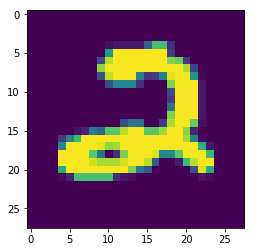

In [18]:
plt.imshow(testimagesdense[0].reshape((28,28)))

In [38]:
predictionLabels = predictions.argmax(axis=-1).reshape((28000,1))
predictionLabels[:10]

array([[2],
       [0],
       [9],
       [9],
       [3],
       [7],
       [0],
       [3],
       [0],
       [3]])

In [23]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [45]:
predictionLabelsPd = pd.DataFrame({'Label':predictionLabels[:, 0]})
ImageId = [i+1 for i in range(28000)]
ImageIdPd = pd.DataFrame({'ImageId':ImageId[:]})

In [46]:
ImageIdPd[:10]

,ImageId
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [51]:
submission = pd.concat([ImageIdPd, predictionLabelsPd], axis = 1)
submission.to_csv('submission.csv', index=False)

In [52]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
